In [8]:
import pandas as pd

# Replace 'your_file.csv' with the actual file path or URL of your CSV file
# file_path = 'BDDD.xlsx'
file_path="rates.csv"
# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())

# Assuming 'data' is a pandas DataFrame
# If not, you can read your CSV file into a DataFrame using pd.read_csv

# Select the 'x' column and get unique values
maturities = data['x'].unique()

# Set x0 value
x0 = 0.1

# Set dt value
dt = 1/12

# Filter the DataFrame where 'x' is equal to x0
filtered_data = data[data['x'] == x0]

# Extract the 'Y' column values
rshort = filtered_data['Y']

   Unnamed: 0    t    x         Y
0           1  0.0  0.1  0.013105
1           2  0.0  0.2  0.020978
2           3  0.0  0.3  0.026742
3           4  0.0  0.4  0.031033
4           5  0.0  0.5  0.034280


In [9]:
# Display summary statistics
print(data.describe())

# Display the first few rows of the DataFrame
print(data.head())


        Unnamed: 0            t            x            Y
count  3600.000000  3600.000000  3600.000000  3600.000000
mean   1800.500000     1.458333     5.050000     0.035454
std    1039.374812     0.865811     2.887008     0.012512
min       1.000000     0.000000     0.100000     0.000452
25%     900.750000     0.729167     2.575000     0.030472
50%    1800.500000     1.458333     5.050000     0.039577
75%    2700.250000     2.187500     7.525000     0.043727
max    3600.000000     2.916667    10.000000     0.054939
   Unnamed: 0    t    x         Y
0           1  0.0  0.1  0.013105
1           2  0.0  0.2  0.020978
2           3  0.0  0.3  0.026742
3           4  0.0  0.4  0.031033
4           5  0.0  0.5  0.034280


        Unnamed: 0            t            x            Y
count  3600.000000  3600.000000  3600.000000  3600.000000
mean   1800.500000     1.458333     5.050000     0.035454
std    1039.374812     0.865811     2.887008     0.012512
min       1.000000     0.000000     0.100000     0.000452
25%     900.750000     0.729167     2.575000     0.030472
50%    1800.500000     1.458333     5.050000     0.039577
75%    2700.250000     2.187500     7.525000     0.043727
max    3600.000000     2.916667    10.000000     0.054939
   Unnamed: 0    t    x         Y
0           1  0.0  0.1  0.013105
1           2  0.0  0.2  0.020978
2           3  0.0  0.3  0.026742
3           4  0.0  0.4  0.031033
4           5  0.0  0.5  0.034280
Plots saved in exploratory_data_analysis.pdf


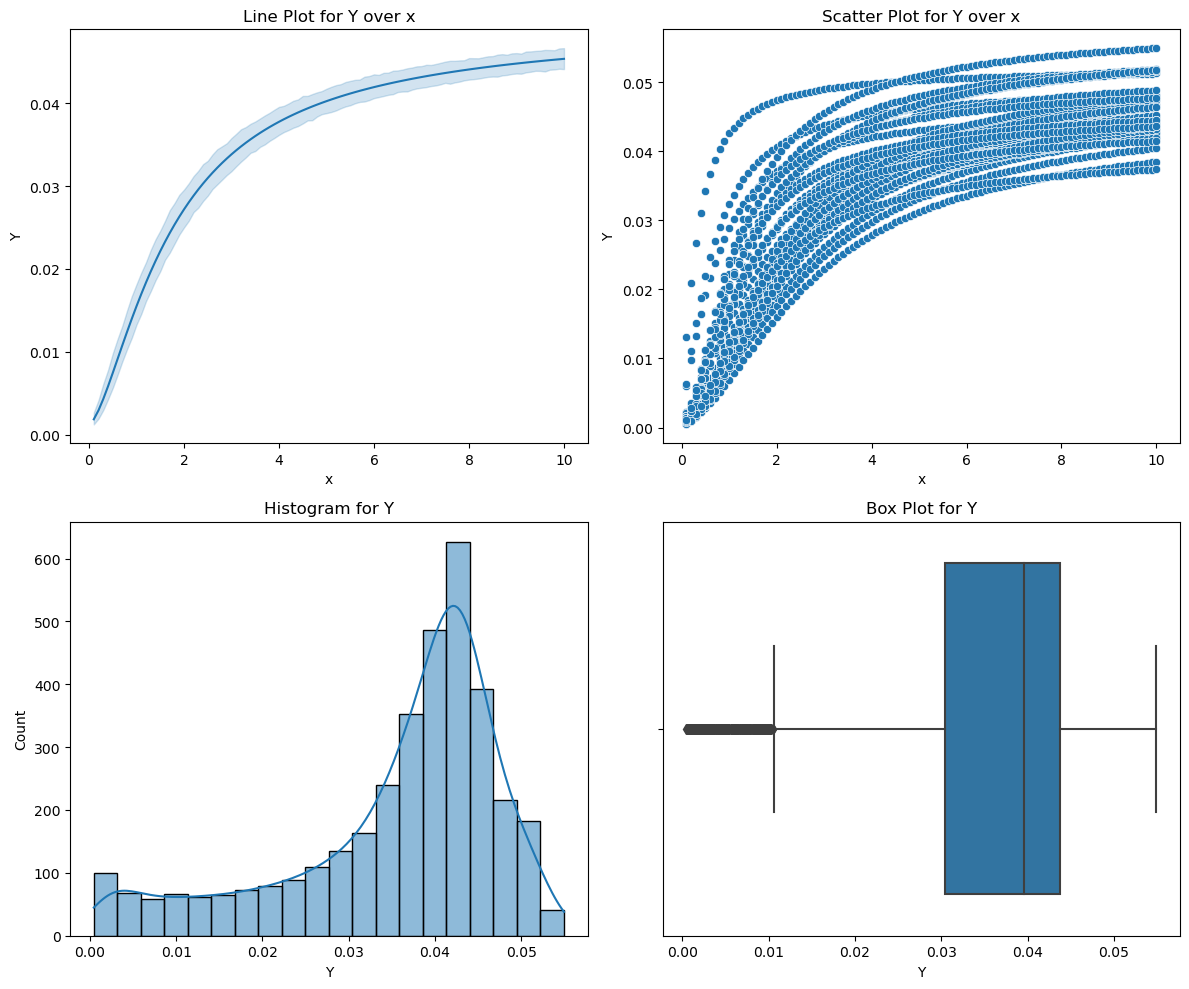

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# Assuming "data" is your DataFrame

# Create a PDF file to save the plots
pdf_filename = "exploratory_data_analysis.pdf"
with PdfPages(pdf_filename) as pdf:

    # Display summary statistics
    print(data.describe())

    # Display the first few rows of the DataFrame
    print(data.head())

    # Create a single figure with subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

    # Line Plot for Y over x
    sns.lineplot(x='x', y='Y', data=data, ax=axes[0, 0])
    axes[0, 0].set_title('Line Plot for Y over x')

    # Scatter Plot for Y over x
    sns.scatterplot(x='x', y='Y', data=data, ax=axes[0, 1])
    axes[0, 1].set_title('Scatter Plot for Y over x')

    # Histogram for Y
    sns.histplot(data['Y'], bins=20, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Histogram for Y')

    # Box Plot for Y
    sns.boxplot(x=data['Y'], ax=axes[1, 1])
    axes[1, 1].set_title('Box Plot for Y')

    # Adjust layout
    plt.tight_layout()

    # Save the figure to the pdf
    pdf.savefig()

# The PDF file is now saved with all the plots on a single page
print(f"Plots saved in {pdf_filename}")


In [11]:
import numpy as np

# Assuming 'data' is a pandas DataFrame with columns 'x' and 'Y'
# If not, you can replace 'data' with your actual DataFrame

# Adding P(t, T)
data['P'] = np.exp(-data['x'] * data['Y'])

# Adding rt
data['r'] = np.repeat(rshort.values, len(maturities))

# Adding f(t, T)
data['f'] = np.where(data['x'] == x0, data['r'], 
                     -(np.log(data['P']) - np.log(data['P'].shift(1))) / (data['x'] - data['x'].shift(1)))

# Display the resulting DataFrame
print(data)


      Unnamed: 0         t     x         Y         P         r         f
0              1  0.000000   0.1  0.013105  0.998690  0.013105  0.013105
1              2  0.000000   0.2  0.020978  0.995813  0.013105  0.028850
2              3  0.000000   0.3  0.026742  0.992009  0.013105  0.038272
3              4  0.000000   0.4  0.031033  0.987664  0.013105  0.043905
4              5  0.000000   0.5  0.034280  0.983006  0.013105  0.047270
...          ...       ...   ...       ...       ...       ...       ...
3595        3596  2.916667   9.6  0.047593  0.633245  0.001095  0.050670
3596        3597  2.916667   9.7  0.047625  0.630045  0.001095  0.050670
3597        3598  2.916667   9.8  0.047656  0.626861  0.001095  0.050670
3598        3599  2.916667   9.9  0.047687  0.623692  0.001095  0.050670
3599        3600  2.916667  10.0  0.047717  0.620540  0.001095  0.050670

[3600 rows x 7 columns]


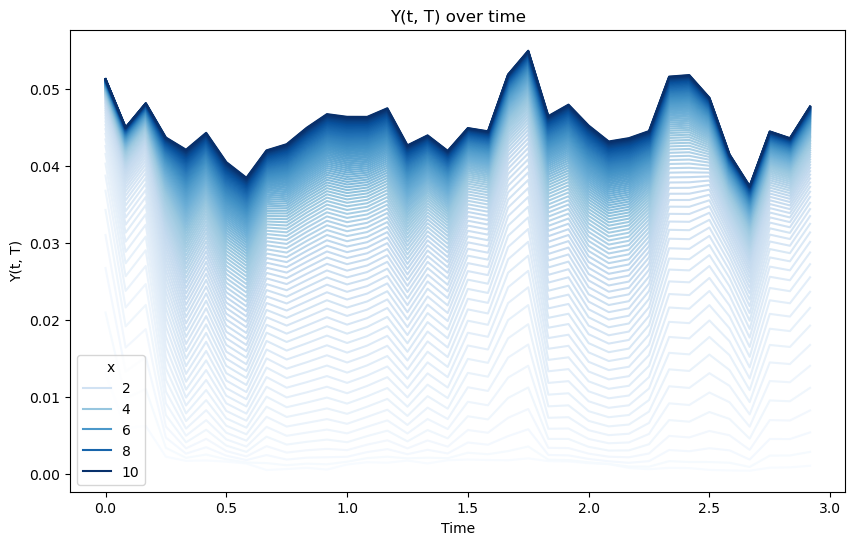

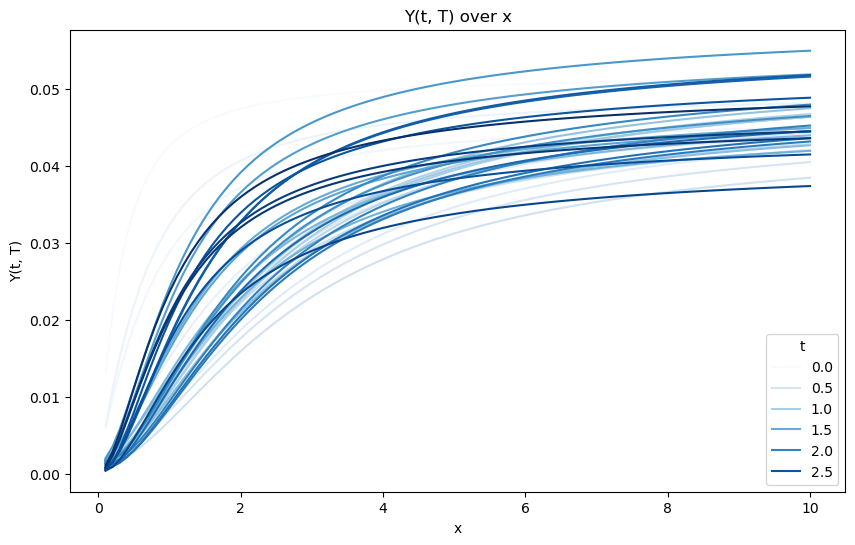

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a pandas DataFrame with columns 't', 'Y', 'x'
# If not, replace 'data' with your actual DataFrame

# Visualizing Y(t, T) over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='t', y='Y', hue='x', data=data, palette='Blues')
plt.title('Y(t, T) over time')
plt.xlabel('Time')
plt.ylabel('Y(t, T)')
plt.savefig('Y_over_time.pdf')  # Save the plot as a PDF file
plt.show()

# Visualizing Y(t, T) over x
plt.figure(figsize=(10, 6))
sns.lineplot(x='x', y='Y', hue='t', data=data, palette='Blues')
plt.title('Y(t, T) over x')
plt.xlabel('x')
plt.ylabel('Y(t, T)')
plt.savefig('Y_over_x.pdf')  # Save the plot as a PDF file
plt.show()


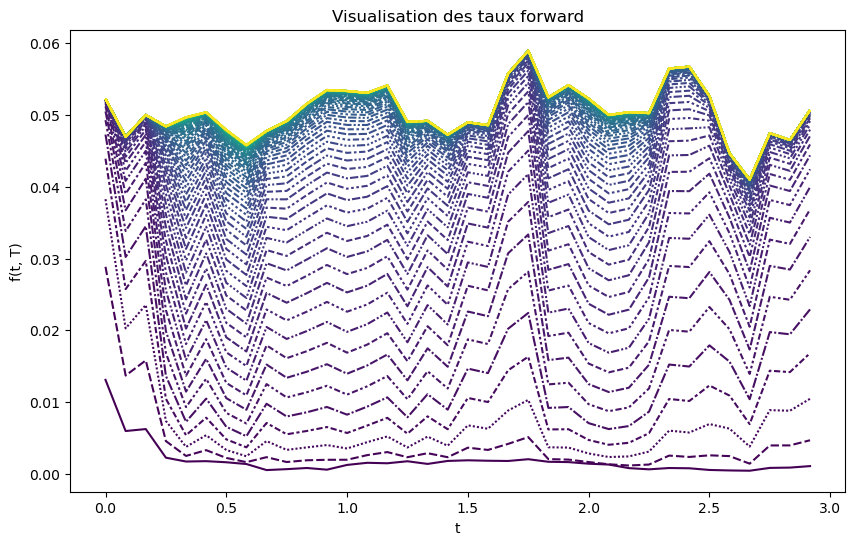

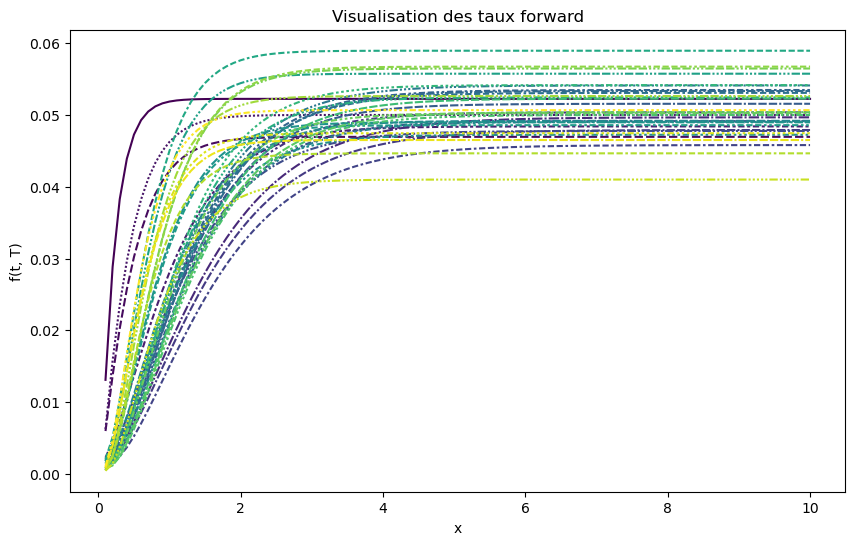

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns  # Utilisez seaborn pour améliorer l'esthétique du graphique

# Supposons que vous avez un DataFrame 'rates' avec les colonnes 't', 'f', et 'x'

# Premier graphique
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='t', y='f', hue='x', style='x', palette='viridis', legend=False)
plt.xlabel('t')
plt.ylabel('f(t, T)')
plt.title('Visualisation des P(t,x) par rapport de x')
plt.savefig('graphique_forward_rates_1.pdf')  # Enregistrez le premier graphique
plt.show()

# Deuxième graphique
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='x', y='f', hue='t', style='t', palette='viridis', legend=False)
plt.xlabel('x')
plt.ylabel('f(t, T)')
plt.title('Visualisation des taux forward')
plt.savefig('graphique_forward_rates_2.pdf')  # Enregistrez le deuxième graphique
plt.show()


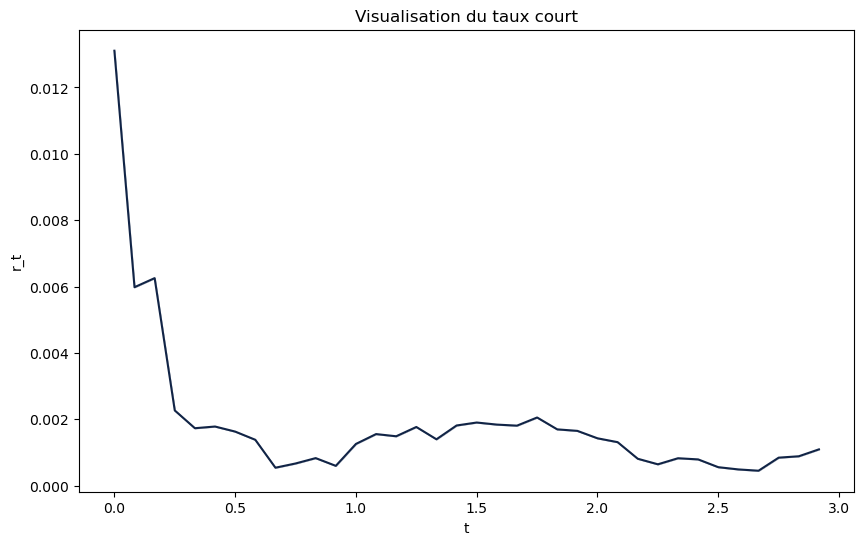

In [19]:
# Visaulisation de rt
import matplotlib.pyplot as plt
import seaborn as sns  # Utilisez seaborn pour améliorer l'esthétique du graphique

# Supposons que vous avez un DataFrame 'rates' avec les colonnes 't' et 'r'

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='t', y='r', color='#112446')
plt.xlabel('t')
plt.ylabel('r_t')
plt.title('Visualisation du taux court')
plt.savefig('graphique_short_rate.pdf', format='pdf')  # Enregistrez le graphique au format PDF
plt.show()


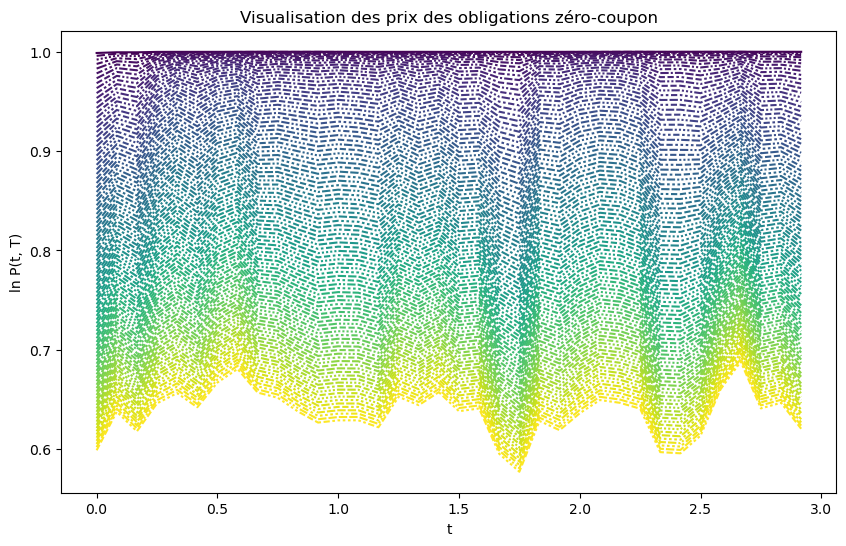

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns  # Utilisez seaborn pour améliorer l'esthétique du graphique

# Supposons que vous avez un DataFrame 'rates' avec les colonnes 't', 'P', et 'x'

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='t', y='P', hue='x', style='x', palette='viridis', legend=False)
plt.xlabel('t')
plt.ylabel('ln P(t, T)')
plt.title('Visualisation des prix des obligations zéro-coupon')
plt.savefig('graphique_zcb_prices.pdf', format='pdf')  # Enregistrez le graphique au format PDF
plt.show()


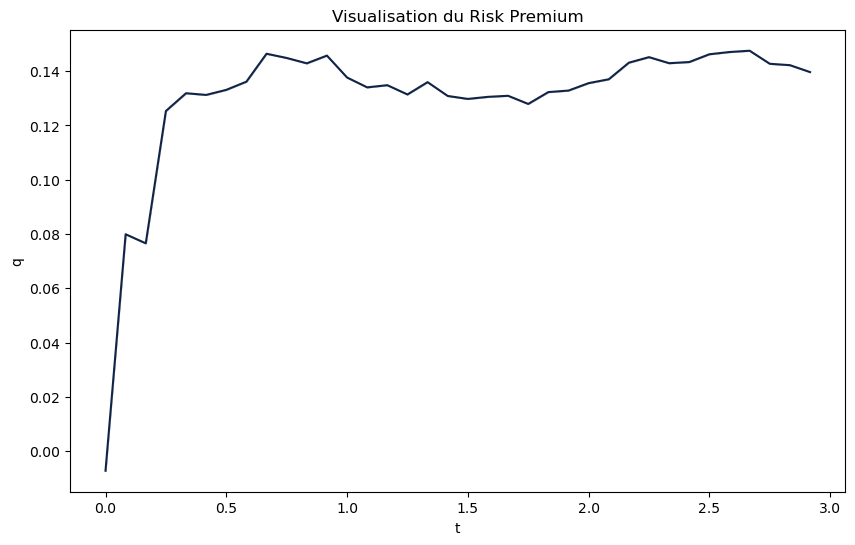

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des paramètres BS
BSparams = data.groupby('x').agg(
    volatility=('P', lambda x: np.sqrt((1 / dt) * np.var(np.log(x / x.shift()), ddof=0))),
    return_=('P', lambda x: np.mean(np.log(x / x.shift())) / dt +
                    np.var(np.log(x / x.shift()), ddof=0) / (2 * dt))
).reset_index()

# Calcul de sigma et mu
sigma = np.sqrt(np.mean(BSparams['volatility']**2))
mu = np.mean(BSparams['return_'])

# Calcul de qt et ajout à la DataFrame rates
data['qt'] = (mu - data['r']) / sigma

# Visualisation et enregistrement en PDF
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='t', y='qt', color='#112446')
plt.xlabel('t')
plt.ylabel('q')
plt.title('Visualisation du Risk Premium')
plt.savefig('graphique_risk_premium.pdf', format='pdf')  # Enregistrez le graphique au format PDF
plt.show()


In [20]:
import numpy as np
from scipy.optimize import minimize

# Calibration de Nelson-Siegel
def nelson_siegel_calibration(Y, x):
    def objective_function(coef, Y, x):
        beta0, beta1, beta2, tau = coef
        NS_rates = beta0 + beta1 * (1 - np.exp(-x/tau))/(x/tau) + beta2 * ((1 - np.exp(-x/tau))/(x/tau) - np.exp(-x/tau))
        return np.sum((Y - NS_rates)**2)

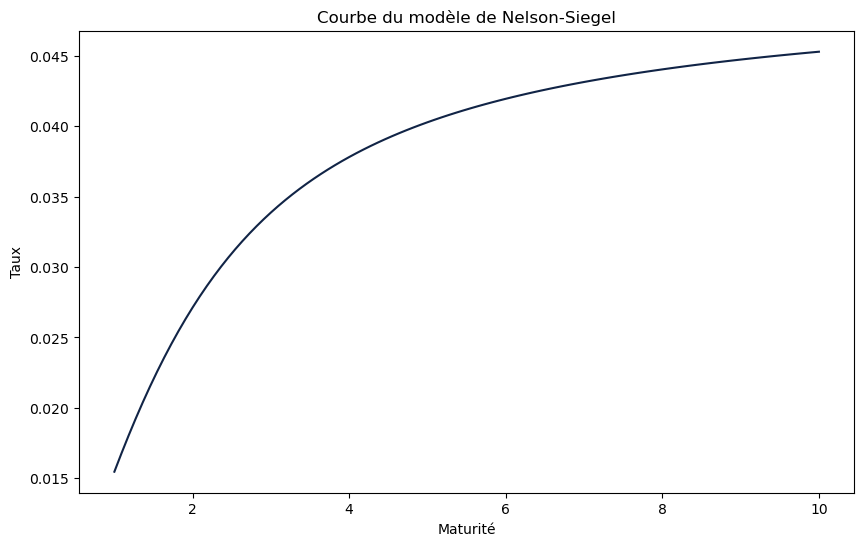

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

# Calibration de Nelson-Siegel
def nelson_siegel_calibration(Y, x):
    def objective_function(coef, Y, x):
        beta0, beta1, beta2, tau = coef
        NS_rates = beta0 + beta1 * (1 - np.exp(-x/tau))/(x/tau) + beta2 * ((1 - np.exp(-x/tau))/(x/tau) - np.exp(-x/tau))
        return np.sum((Y - NS_rates)**2)

    initial_guess = [0.02, -0.01, -0.02, 1.0]
    result = minimize(objective_function, initial_guess, args=(Y, x), method='L-BFGS-B')
    
    if result.success:
        return result.x
    else:
        raise RuntimeError("Calibration failed")

# Fonction pour générer les taux à partir des paramètres calibrés
def nelson_siegel_rates(coef, t):
    beta0, beta1, beta2, tau = coef
    return beta0 + beta1 * (1 - np.exp(-t/tau))/(t/tau) + beta2 * ((1 - np.exp(-t/tau))/(t/tau) - np.exp(-t/tau))

# Calcul des estimations
def nelson_siegel_curve(parameters, maturities):
    beta0, beta1, beta2, tau = parameters
    rates = beta0 + beta1 * (1 - np.exp(-maturities/tau))/(maturities/tau) + beta2 * ((1 - np.exp(-maturities/tau))/(maturities/tau) - np.exp(-maturities/tau))
    return pd.DataFrame({'maturity': maturities, 'rates': rates})

# Supposons que vous avez un DataFrame 'rates' avec les colonnes 'Y' et 'x'
Y_values = data['Y'].values
x_values = data['x'].values

# Calibration de Nelson-Siegel
NS_parameters = nelson_siegel_calibration(Y_values, x_values)

# Génération des taux à partir des paramètres calibrés
maturities = np.linspace(1, 10, 100)  # À ajuster selon vos besoins
curve_NS = nelson_siegel_curve(NS_parameters, maturities)

# Visualisation de la courbe
plt.figure(figsize=(10, 6))
sns.lineplot(data=curve_NS, x='maturity', y='rates', color='#112446')
plt.xlabel('Maturité')
plt.ylabel('Taux')
plt.title('Courbe du modèle de Nelson-Siegel')
plt.savefig('courbe.pdf', format='pdf')
plt.show()

In [22]:
import matplotlib.backends.backend_pdf as pdf_backend

# Assuming 'data' is a pandas DataFrame with the required columns

# Create a PDF file to save the plots
with pdf_backend.PdfPages('combined_plots.pdf') as pdf:
    # Visualizing Y(t, T) over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='t', y='Y', hue='x', data=data, palette='viridis')
    plt.title('Y(t, T) over time')
    plt.xlabel('Time')
    plt.ylabel('Y(t, T)')
    pdf.savefig()  # Save the plot to the PDF file
    plt.close()

    # Visualizing Y(t, T) over x
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='x', y='Y', hue='t', data=data, palette='viridis')
    plt.title('Y(t, T) over x')
    plt.xlabel('x')
    plt.ylabel('Y(t, T)')
    pdf.savefig()  # Save the plot to the PDF file
    plt.close()

    # Visualizing P(t, x)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='t', y='f', hue='x', style='x', palette='viridis', legend=False)
    plt.xlabel('t')
    plt.ylabel('f(t, T)')
    plt.title('Visualisation des P(t,x) par rapport de x')
    pdf.savefig()  # Save the plot to the PDF file
    plt.close()

    # Visualizing rt
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='t', y='r', color='#112446')
    plt.xlabel('t')
    plt.ylabel('r_t')
    plt.title('Visualisation du taux court')
    pdf.savefig()  # Save the plot to the PDF file
    plt.close()

    # Visualizing zero-coupon bond prices
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='t', y='P', hue='x', style='x', palette='viridis', legend=False)
    plt.xlabel('t')
    plt.ylabel('ln P(t, T)')
    plt.title('Visualisation des prix des obligations zéro-coupon')
    pdf.savefig()  # Save the plot to the PDF file
    plt.close()

Plots saved in combined_plots.pdf


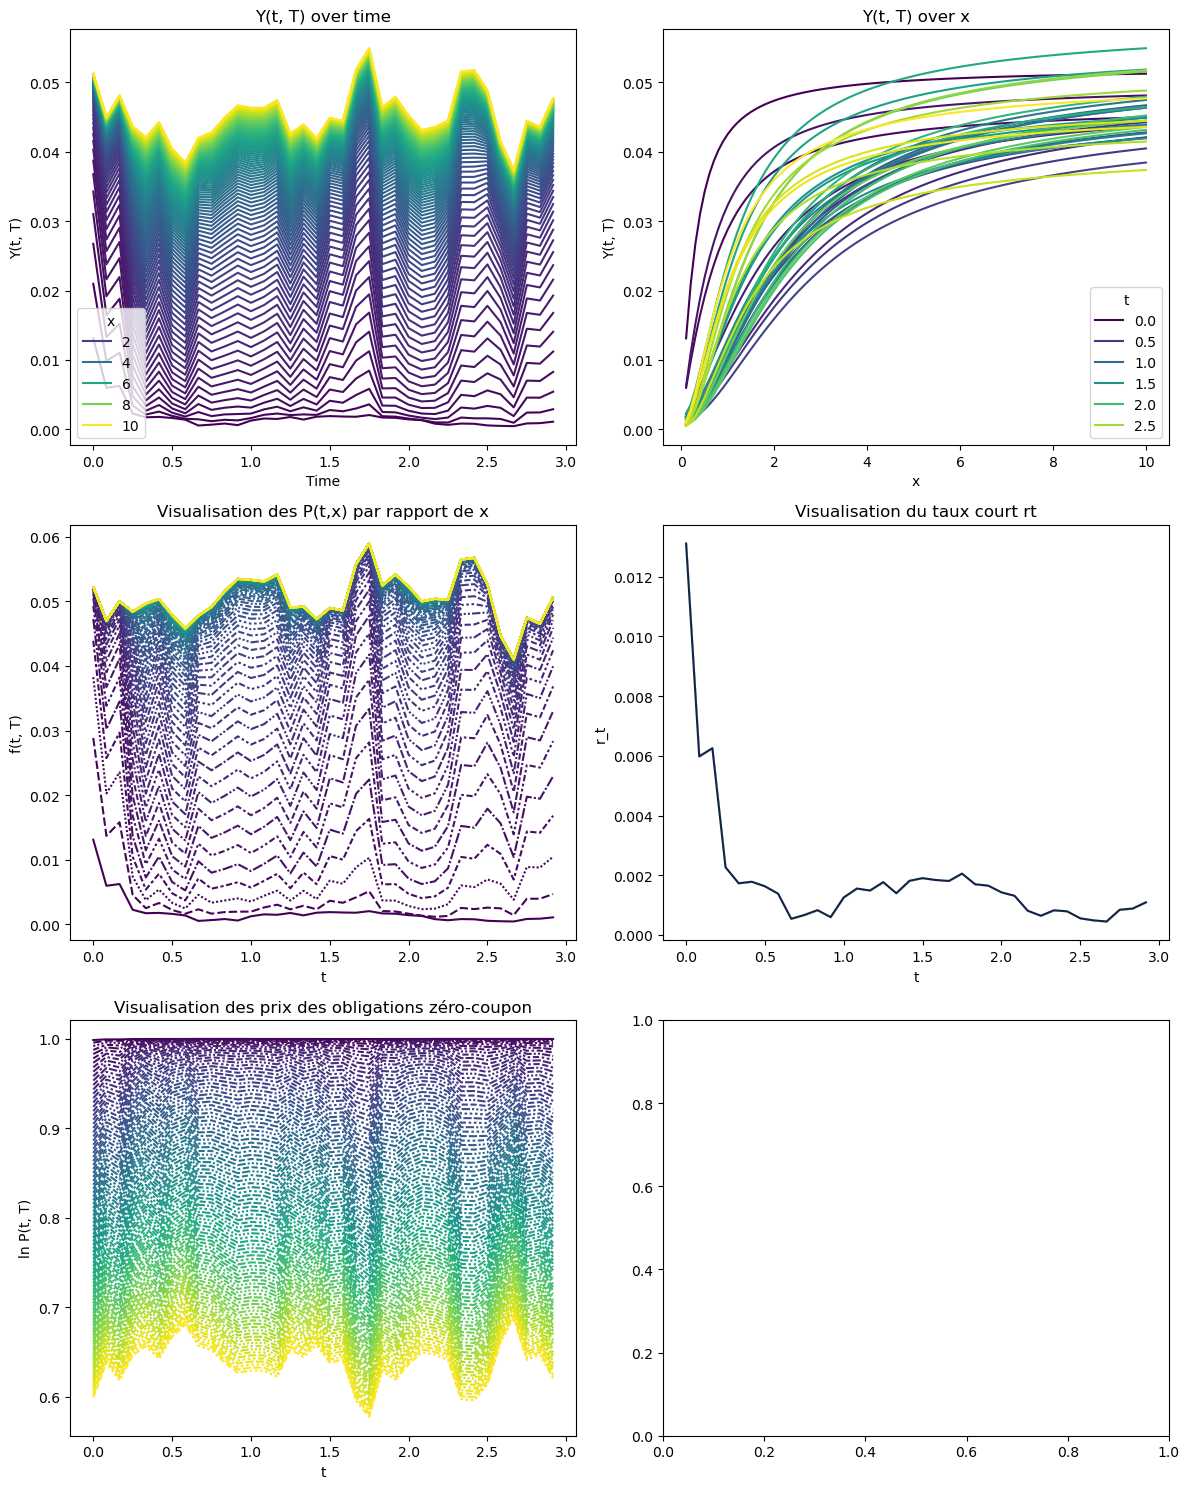

In [23]:
import matplotlib.backends.backend_pdf as pdf_backend

# Assuming 'data' is a pandas DataFrame with the required columns

# Create a PDF file to save the plots
with pdf_backend.PdfPages('combined_plots.pdf') as pdf:
    # Create a single figure with subplots
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

    # Visualizing Y(t, T) over time
    sns.lineplot(x='t', y='Y', hue='x', data=data, palette='viridis', ax=axes[0, 0])
    axes[0, 0].set_title('Y(t, T) over time')
    axes[0, 0].set_xlabel('Time')
    axes[0, 0].set_ylabel('Y(t, T)')

    # Visualizing Y(t, T) over x
    sns.lineplot(x='x', y='Y', hue='t', data=data, palette='viridis', ax=axes[0, 1])
    axes[0, 1].set_title('Y(t, T) over x')
    axes[0, 1].set_xlabel('x')
    axes[0, 1].set_ylabel('Y(t, T)')

    # Visualizing P(t, x)
    sns.lineplot(data=data, x='t', y='f', hue='x', style='x', palette='viridis', legend=False, ax=axes[1, 0])
    axes[1, 0].set_xlabel('t')
    axes[1, 0].set_ylabel('f(t, T)')
    axes[1, 0].set_title('Visualisation des P(t,x) par rapport de x')

    # Visualizing rt
    sns.lineplot(data=data, x='t', y='r', color='#112446', ax=axes[1, 1])
    axes[1, 1].set_xlabel('t')
    axes[1, 1].set_ylabel('r_t')
    axes[1, 1].set_title('Visualisation du taux court rt')

    # Visualizing zero-coupon bond prices
    sns.lineplot(data=data, x='t', y='P', hue='x', style='x', palette='viridis', legend=False, ax=axes[2, 0])
    axes[2, 0].set_xlabel('t')
    axes[2, 0].set_ylabel('ln P(t, T)')
    axes[2, 0].set_title('Visualisation des prix des obligations zéro-coupon')

    # Adjust layout
    plt.tight_layout()

    # Save the figure to the pdf
    pdf.savefig()

# The PDF file is now saved with the first 5 plots on a single page
print("Plots saved in combined_plots.pdf")
